Analisis exploratorio de datos

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")

# Cargar el archivo CSV
df = pd.read_csv('bank.csv', sep=';')

# Ver las primeras filas
display(df.head())

# Información general del dataset
print("Información general:")
df.info()

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Estadísticas descriptivas:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Analizar la variable objetivo : 'y'

Distribución de la variable 'y':
y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


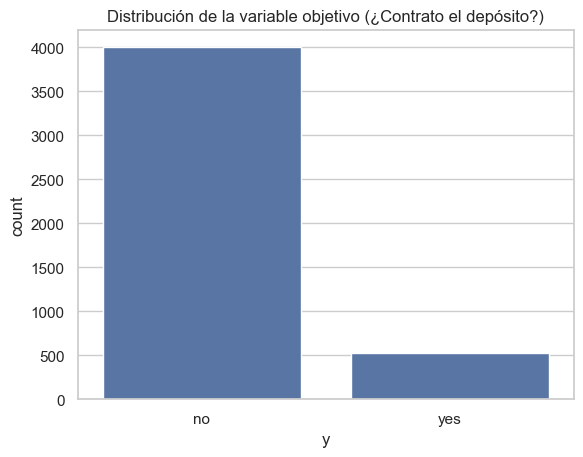

In [52]:
# Distribución de la variable objetivo
print("Distribución de la variable 'y':")
print(df['y'].value_counts(normalize=True))  # proporciones

# Gráfico de distribución
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo (¿Contrato el depósito?)')
plt.show()



Analisis de valores nulos y unknown

Análisis de valores nulos y unknown por columna:

Resumen de valores nulos y unknown:
           Valores_Nulos  Valores_Unknown  Total_Registros  Porcentaje_Nulos  \
job                    0               38             4521               0.0   
education              0              187             4521               0.0   
contact                0             1324             4521               0.0   
poutcome               0             3705             4521               0.0   

           Porcentaje_Unknown  
job                  0.840522  
education            4.136253  
contact             29.285556  
poutcome            81.950896  


<Figure size 1200x600 with 0 Axes>

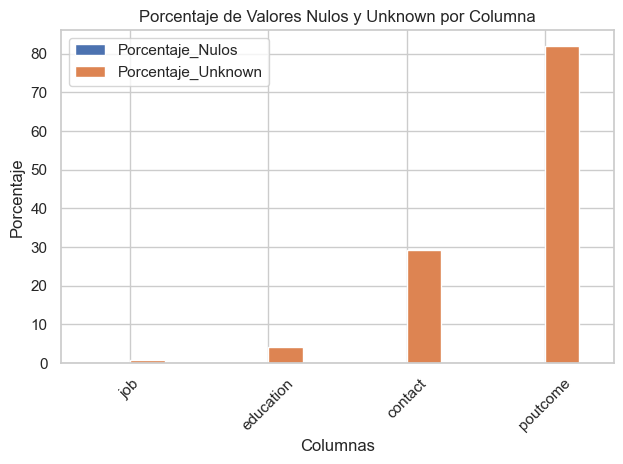


Análisis detallado de valores 'unknown' por columna:

Columna: job
Distribución de valores:
job
management       0.214
blue-collar      0.209
technician       0.170
admin.           0.106
services         0.092
retired          0.051
self-employed    0.040
entrepreneur     0.037
unemployed       0.028
housemaid        0.025
student          0.019
unknown          0.008
Name: proportion, dtype: float64

Columna: education
Distribución de valores:
education
secondary    0.510
tertiary     0.299
primary      0.150
unknown      0.041
Name: proportion, dtype: float64

Columna: contact
Distribución de valores:
contact
cellular     0.641
unknown      0.293
telephone    0.067
Name: proportion, dtype: float64

Columna: poutcome
Distribución de valores:
poutcome
unknown    0.820
failure    0.108
other      0.044
success    0.029
Name: proportion, dtype: float64


In [53]:
# Análisis combinado de valores nulos y unknown
print("Análisis de valores nulos y unknown por columna:")

# Crear un DataFrame para el análisis
null_analysis = pd.DataFrame({
    'Valores_Nulos': df.isnull().sum(),
    'Valores_Unknown': (df == 'unknown').sum(),
    'Total_Registros': len(df)
})

# Calcular porcentajes
null_analysis['Porcentaje_Nulos'] = (null_analysis['Valores_Nulos'] / null_analysis['Total_Registros']) * 100
null_analysis['Porcentaje_Unknown'] = (null_analysis['Valores_Unknown'] / null_analysis['Total_Registros']) * 100

# Mostrar solo las columnas que tienen valores nulos o unknown
null_analysis = null_analysis[(null_analysis['Valores_Nulos'] > 0) | (null_analysis['Valores_Unknown'] > 0)]
print("\nResumen de valores nulos y unknown:")
print(null_analysis)

# Visualización
plt.figure(figsize=(12, 6))
null_analysis[['Porcentaje_Nulos', 'Porcentaje_Unknown']].plot(kind='bar')
plt.title('Porcentaje de Valores Nulos y Unknown por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis detallado de las columnas con valores unknown
print("\nAnálisis detallado de valores 'unknown' por columna:")
for column in df.columns:
    if (df[column] == 'unknown').any():
        print(f"\nColumna: {column}")
        print("Distribución de valores:")
        print(df[column].value_counts(normalize=True).round(3))

Determinar los atributos mas importantes con respecto a la clase objetivo

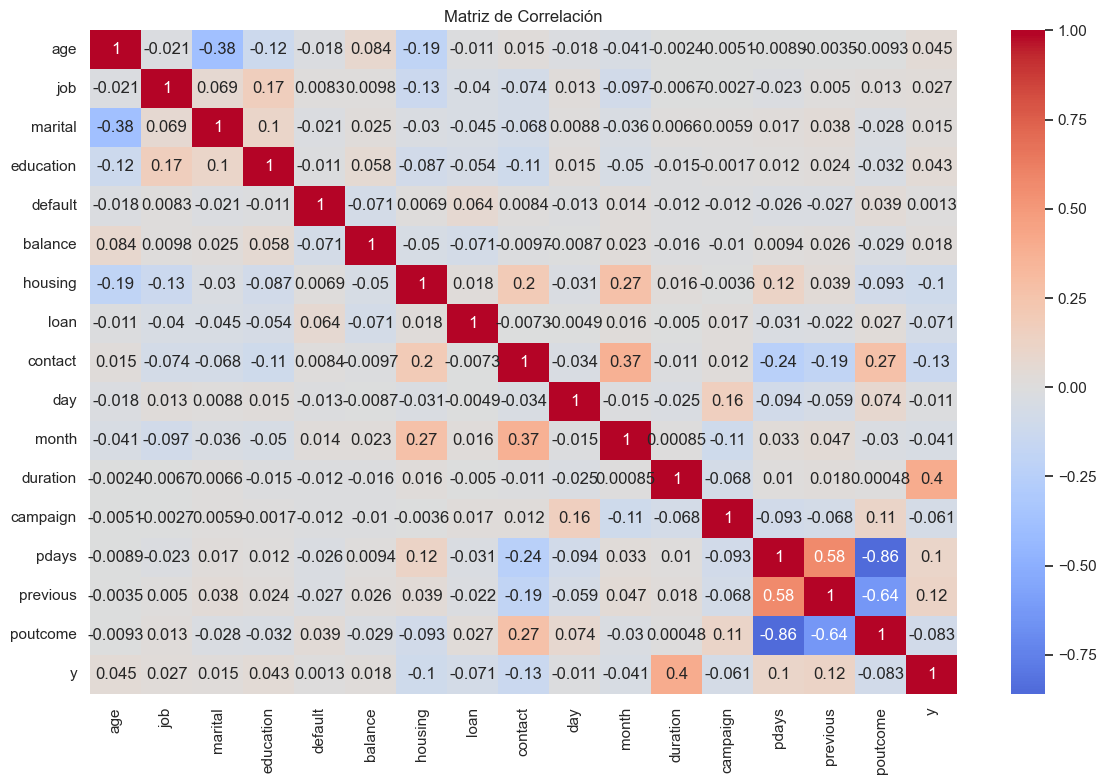

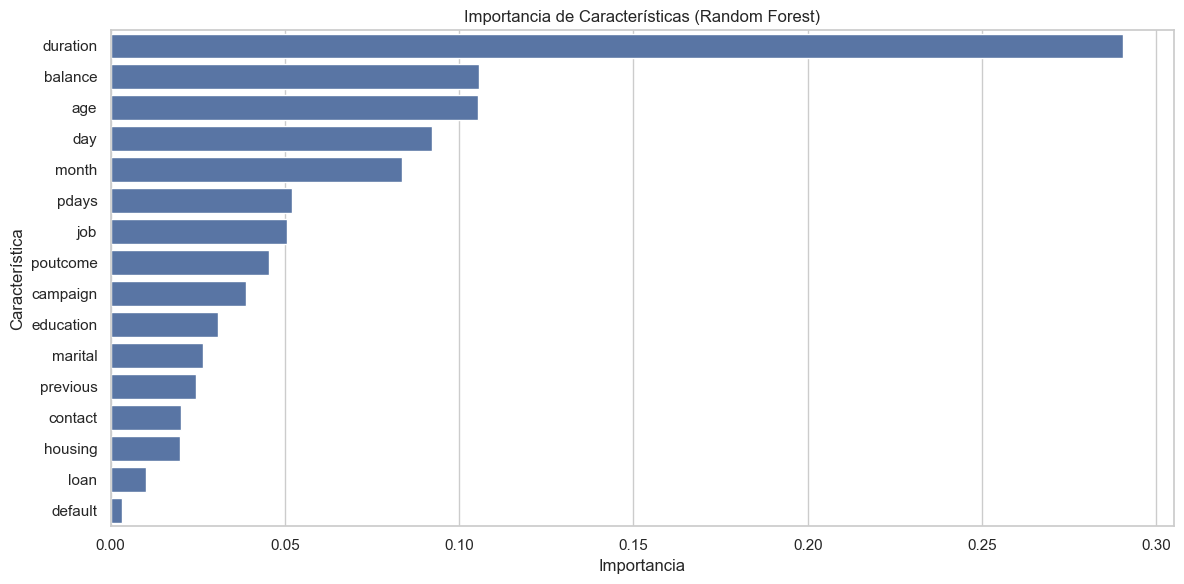


Top 10 características más importantes:
   Característica  Importancia
11       duration     0.290557
5         balance     0.105800
0             age     0.105436
9             day     0.092174
10          month     0.083508
13          pdays     0.052059
1             job     0.050703
15       poutcome     0.045556
12       campaign     0.038802
3       education     0.030945


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Configuración visual
sns.set(style="whitegrid")

# Cargar el archivo CSV
df_visualizar = pd.read_csv('bank.csv', sep=';')

# Preparación de datos para el análisis
# Convertir la variable objetivo a numérica
le = LabelEncoder()
df_visualizar['y'] = le.fit_transform(df_visualizar['y'])

# Convertir variables categóricas a numéricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_visualizar[col] = le.fit_transform(df_visualizar[col])

# 1. Análisis de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_visualizar.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 2. Análisis de importancia de características usando Random Forest
X = df_visualizar.drop('y', axis=1)
y = df_visualizar['y']

# Entrenar un modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancia de características
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importancia', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance)
plt.title('Importancia de Características (Random Forest)')
plt.tight_layout()
plt.show()

# Mostrar las características más importantes
print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

Convertir los unknown a nulos

In [55]:
# Primero, veamos cuántos valores 'unknown' hay antes de la limpieza
print("Antes de la limpieza:")
print(df.isin(['unknown']).sum())

# Crear una copia del DataFrame
df_clean = df.copy()

# Reemplazar 'unknown' con NaN
df_clean = df_clean.replace('unknown', pd.NA)

# Verificar si quedaron valores 'unknown'
print("\nDespués de la limpieza:")
print(df_clean.isin(['unknown']).sum())

# Mostrar el número de filas antes y después
print(f"\nNúmero de filas antes: {len(df)}")
print(f"Número de filas después: {len(df_clean)}")

# Mostrar las columnas que aún tienen valores 'unknown' si las hay
unknown_columns = df_clean.columns[df_clean.isin(['unknown']).any()].tolist()
if unknown_columns:
    print("\nColumnas que aún tienen valores 'unknown':")
    print(unknown_columns)

Antes de la limpieza:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

Después de la limpieza:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Número de filas antes: 4521
Número de filas después: 4521


In [56]:
# Análisis combinado de valores nulos y unknown
print("Análisis de valores nulos y unknown por columna:")

# Crear un DataFrame para el análisis
null_analysis = pd.DataFrame({
    'Valores_Nulos': df_clean.isnull().sum(),
    'Valores_Unknown': (df_clean == 'unknown').sum(),
    'Total_Registros': len(df_clean)
})

# Calcular porcentajes
null_analysis['Porcentaje_Nulos'] = (null_analysis['Valores_Nulos'] / null_analysis['Total_Registros']) * 100
null_analysis['Porcentaje_Unknown'] = (null_analysis['Valores_Unknown'] / null_analysis['Total_Registros']) * 100

# Mostrar solo las columnas que tienen valores nulos o unknown
null_analysis = null_analysis[(null_analysis['Valores_Nulos'] > 0) | (null_analysis['Valores_Unknown'] > 0)]
print("\nResumen de valores nulos y unknown:")
print(null_analysis)

# Análisis detallado de las columnas con valores nulos (que eran unknown)
print("\nAnálisis detallado de valores nulos por columna:")
for column in df_clean.columns:
    if df_clean[column].isnull().any():
        print(f"\nColumna: {column}")
        print("Distribución de valores:")
        print(df_clean[column].value_counts(normalize=True).round(3))

Análisis de valores nulos y unknown por columna:

Resumen de valores nulos y unknown:
           Valores_Nulos  Valores_Unknown  Total_Registros  Porcentaje_Nulos  \
job                   38                0             4521          0.840522   
education            187                0             4521          4.136253   
contact             1324                0             4521         29.285556   
poutcome            3705                0             4521         81.950896   

           Porcentaje_Unknown  
job                       0.0  
education                 0.0  
contact                   0.0  
poutcome                  0.0  

Análisis detallado de valores nulos por columna:

Columna: job
Distribución de valores:
job
management       0.216
blue-collar      0.211
technician       0.171
admin.           0.107
services         0.093
retired          0.051
self-employed    0.041
entrepreneur     0.037
unemployed       0.029
housemaid        0.025
student          0.019
Name: p

Análisis de valores nulos por columna

In [57]:
print("Porcentaje de valores nulos por columna:")
for col in ['job', 'education', 'contact', 'poutcome']:
    nulos = df_clean[col].isnull().sum()
    porcentaje = (nulos / len(df_clean)) * 100
    print(f"{col}: {porcentaje:.2f}%")

Porcentaje de valores nulos por columna:
job: 0.84%
education: 4.14%
contact: 29.29%
poutcome: 81.95%


Eliminar la columna poutcome y las filas job , education y contact

In [58]:
df_clean = df.drop(columns =['poutcome'])


for col in ['job' , 'education']:
    df_clean = df_clean[df_clean[col] != 'unknown']



print("Tamano inicial de dataset: ",df.shape[0])
print("Tamano final del dataset: ",df_clean.shape[0])

Tamano inicial de dataset:  4521
Tamano final del dataset:  4311


Entrenamiento y prueba

In [59]:
from sklearn.model_selection import train_test_split
import pandas as pd



# 1. Separar X e y desde el dataset limpio
X = df_clean.drop(columns=['y'])
y = df_clean['y'] 

# 2. One-Hot Encoding de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Verificar que X e y tengan la misma cantidad de filas
print("X_encoded shape:", X_encoded.shape)
print("y shape:", y.shape)

# 4. División en entrenamiento y prueba (70/30), manteniendo proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("División completada ")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

X_encoded shape: (4311, 37)
y shape: (4311,)
División completada 
Train shape: (3017, 37)
Test shape: (1294, 37)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

# 1. Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2. Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 3. Calcular F1-score (para la clase 'yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')
print("F1-score:", f1)

# 4. (Opcional) Ver reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

F1-score: 0.2376237623762376

Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.90      0.97      0.94      1145
         yes       0.45      0.16      0.24       149

    accuracy                           0.88      1294
   macro avg       0.68      0.57      0.59      1294
weighted avg       0.85      0.88      0.86      1294



c:\Users\Elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 F1-score (para 'yes'): 0.16574585635359115

Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.89      0.99      0.94      1145
         yes       0.47      0.10      0.17       149

    accuracy                           0.88      1294
   macro avg       0.68      0.54      0.55      1294
weighted avg       0.84      0.88      0.85      1294



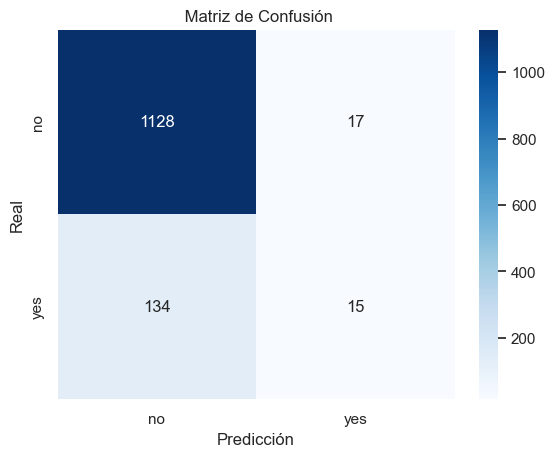

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo
rf_model = RandomForestClassifier(
    class_weight='balanced',  # ajusta por desbalance
    n_estimators=100,         # número de árboles
    random_state=42
)
rf_model.fit(X_train, y_train)

# . Predicciones
y_pred_rf = rf_model.predict(X_test)

# . Evaluación
f1_rf = f1_score(y_test, y_pred_rf, pos_label='yes')
print(" F1-score (para 'yes'):", f1_rf)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# . Matriz de confusión (visual)
cm = confusion_matrix(y_test, y_pred_rf, labels=['no', 'yes'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title(" Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Codificación de variables categóricas
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'y':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# División en variables predictoras y target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)



🔎 Modelo: Árbol de Decisión
Matriz de Confusión:
[[1109   92]
 [  87   69]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9273    0.9234    0.9253      1201
           1     0.4286    0.4423    0.4353       156

    accuracy                         0.8681      1357
   macro avg     0.6779    0.6829    0.6803      1357
weighted avg     0.8699    0.8681    0.8690      1357

AUC-ROC: 0.6829


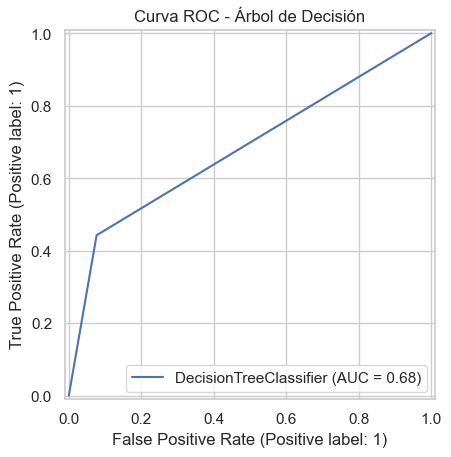

Área bajo la curva Precision-Recall: 0.4675


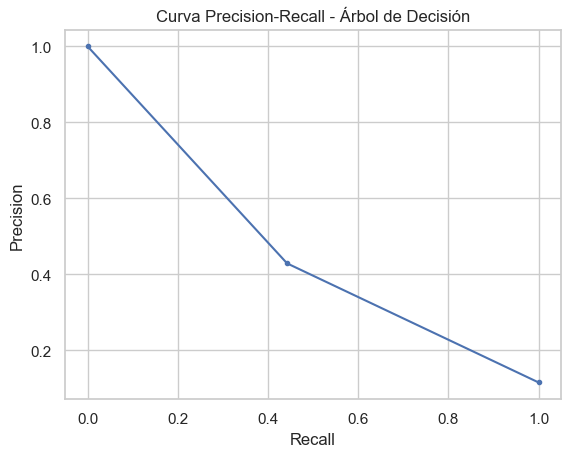


🔎 Modelo: Bosque Aleatorio
Matriz de Confusión:
[[1176   25]
 [ 115   41]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9109    0.9792    0.9438      1201
           1     0.6212    0.2628    0.3694       156

    accuracy                         0.8968      1357
   macro avg     0.7661    0.6210    0.6566      1357
weighted avg     0.8776    0.8968    0.8778      1357

AUC-ROC: 0.8847


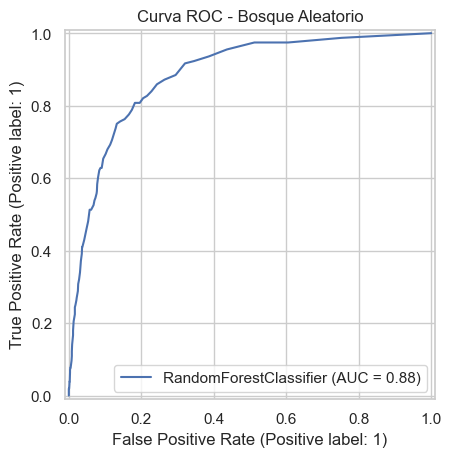

Área bajo la curva Precision-Recall: 0.5099


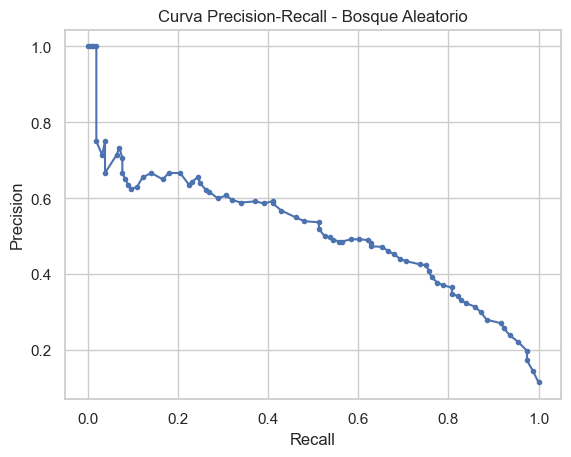


🔎 Modelo: SVM
Matriz de Confusión:
[[1188   13]
 [ 134   22]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8986    0.9892    0.9417      1201
           1     0.6286    0.1410    0.2304       156

    accuracy                         0.8917      1357
   macro avg     0.7636    0.5651    0.5861      1357
weighted avg     0.8676    0.8917    0.8600      1357

AUC-ROC: 0.8167


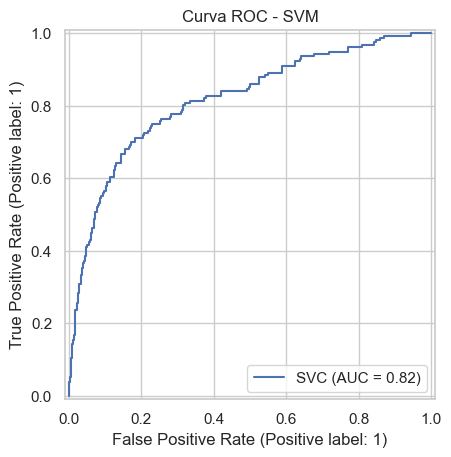

Área bajo la curva Precision-Recall: 0.4374


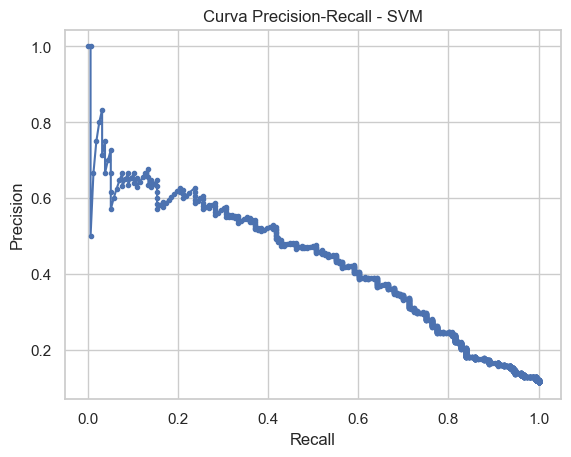


🔎 Modelo: Regresión Logística
Matriz de Confusión:
[[1169   32]
 [ 128   28]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9013    0.9734    0.9359      1201
           1     0.4667    0.1795    0.2593       156

    accuracy                         0.8821      1357
   macro avg     0.6840    0.5764    0.5976      1357
weighted avg     0.8513    0.8821    0.8582      1357

AUC-ROC: 0.8513


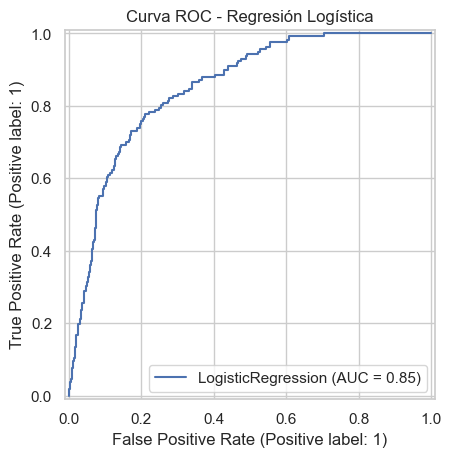

Área bajo la curva Precision-Recall: 0.3999


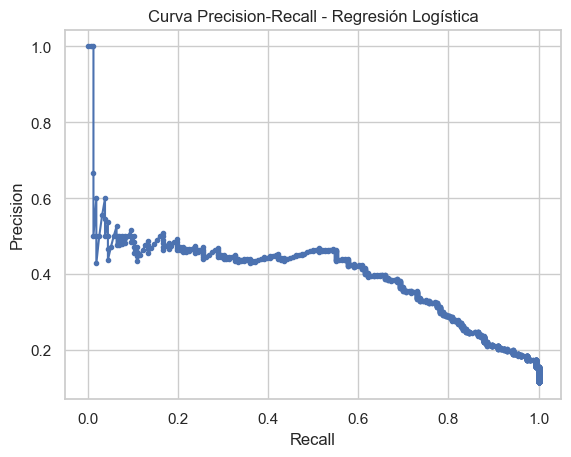

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, precision_recall_curve, auc

for nombre, modelo in modelos.items():
    print(f"\n🔎 Modelo: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Métricas
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, digits=4))

    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Curva ROC
    RocCurveDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Curva ROC - {nombre}")
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    print(f"Área bajo la curva Precision-Recall: {pr_auc:.4f}")
    plt.plot(recall, precision, marker='.')
    plt.title(f"Curva Precision-Recall - {nombre}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.show()


In [64]:
for nombre, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    print(f"PR AUC {nombre}: {pr_auc:.4f}")


PR AUC Árbol de Decisión: 0.4675
PR AUC Bosque Aleatorio: 0.5099
PR AUC SVM: 0.4374
PR AUC Regresión Logística: 0.3999
